In [ ]:
pip install praw

In [ ]:
pip install nrclex

In [ ]:
pip install python-dotenv

In [ ]:
import praw

from dotenv import dotenv_values

config = dotenv_values(".env")

reddit = praw.Reddit(
    client_id=config["client_id"],
    client_secret=config["client_secret"],
    user_agent=config["user_agent"],
)


subreddit = reddit.subreddit('radiohead')

# display the subreddit name
print(subreddit.display_name)

# display the subreddit title
print(subreddit.title)

# display the subreddit description
print(subreddit.description)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



radiohead
/r/Radiohead
[](#tagline)
*Do not react* 

****

* **[](#oknotok-icon)Posting Rules**

* 1) Posts must be relevant to Radiohead, its members, or their side-projects. 

* 2) No personal insults/bashing. 

* 3) No spam.

* 4) Low quality/effort posts will be removed by moderator discretion. 

* 5) Excessive polls/rankings/tier lists will be removed by moderator discretion. 

* 6) Respect the band's privacy. Do not share private information, gossip or paparazzis/creep shots.

* 7) No fanfic.

* 8) No recent reposts. Search before posting.

* 9) No piracy zone; support the artists.

* 10) No "underrated", "overrated", or "why isn't anyone talking about ___?" posts.

* 11) Failure to follow these rules may result in bans.

****

* **[](#kidabear-icon)Tour Events**

* **The Smile**

* **[TICKET TRADE/SALE THREAD](https://www.reddit.com/r/radiohead/comments/17zbz8l/official_ticket_buyselltrade_thread_the_smile_2024/)**

* **EUROPE, MARCH 2024**

* 7th - Dublin - 3Arena

* 13th - Cop

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from nrclex import NRCLex
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')

def clean_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def analyze_emotion(text: str) -> str:
    lexicon = NRCLex(clean_text(text))
    emotions = lexicon.affect_frequencies
    dominant_emotion = max(emotions, key=emotions.get)
    return dominant_emotion

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
from datetime import datetime

subreddit = reddit.subreddit("radiohead")
submissions = []

for post in subreddit.top(time_filter='all', limit=1500):
    submissions.append([
        post.title,
        post.num_comments,
        datetime.utcfromtimestamp(post.created_utc).strftime("%Y-%m-%d"),
        post.author,
        post.score,
        post.upvote_ratio,
        post.num_crossposts,
        analyze_emotion(post.title),
    ])

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [ ]:
import nltk

analyzer = SentimentIntensityAnalyzer()

for post in submissions:
    score = analyzer.polarity_scores(clean_text(post[0]))
    post.append(score["compound"])

In [ ]:
import pandas as pd

df = pd.DataFrame(
    submissions,
    columns=["title", "comments", "created", "author", "upvotes", "upvote_ratio", "crossposts", "emotion", "compound"],
)

df2=pd.DataFrame(
    submissions,
    columns=["title", "comments", "created", "author", "upvotes", "upvote_ratio", "crossposts", "emotion", "compound"],
)

df["sentiment"] = 0
df.loc[df["compound"] > 0.20, "sentiment"] = 1
df.loc[df["compound"] < -0.20, "sentiment"] = -1

df.drop("compound", axis=1, inplace=True)
df

,title,comments,created,author,upvotes,upvote_ratio,crossposts,emotion,sentiment
0,This just happened on twitter.,1863,2017-07-11,lpseudo,26498,0.92,0,fear,0
1,Radiohead - Burn The Witch,2173,2016-05-03,dvstec,15289,0.83,0,fear,-1
2,Accurate.,237,2017-05-06,AmbassadorOfMorning,10723,0.94,0,trust,0
3,Radiohead - Daydreaming,1823,2016-05-06,matthaydon,7909,0.87,0,fear,0
4,Accurate,69,2017-12-09,spaaaaaaaaaace_123,7670,0.97,0,trust,0
...,...,...,...,...,...,...,...,...,...
994,Ohio Fan,42,2019-12-18,410rDesign,1158,0.99,0,fear,1
995,THIS SUNDAY,61,2019-07-04,DanielStashkin1,1161,0.99,1,fear,0
996,i was playing fortnite the other day (for the ...,58,2023-11-22,f1nn_999,1160,0.97,0,fear,1
997,Finally someone notices the three “boops” at t...,127,2023-08-20,Crafter-lee,1153,0.98,0,anticipation,-1


<Axes: title={'center': 'Distribution of emotions on r/radiohead'}, xlabel='Emotion', ylabel='Posts Count'>

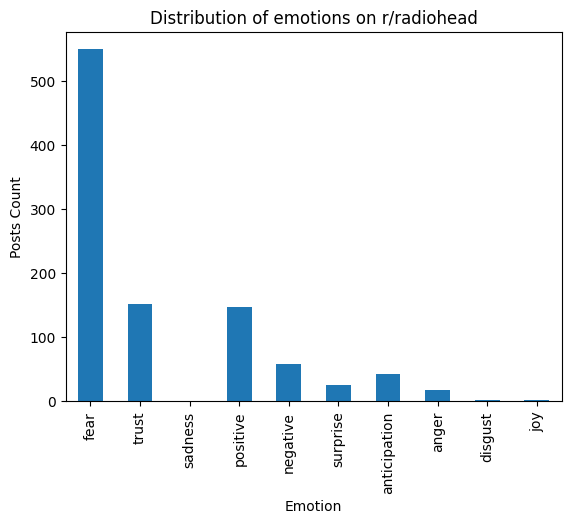

In [ ]:
emotion_count = df.emotion.value_counts(sort=False)
emotion_count.plot.bar(xlabel="Emotion", ylabel="Posts Count", title="Distribution of emotions on r/radiohead")

<Axes: title={'center': 'Distribution of sentiments on r/radiohead'}, xlabel='Sentiment', ylabel='Posts Count'>

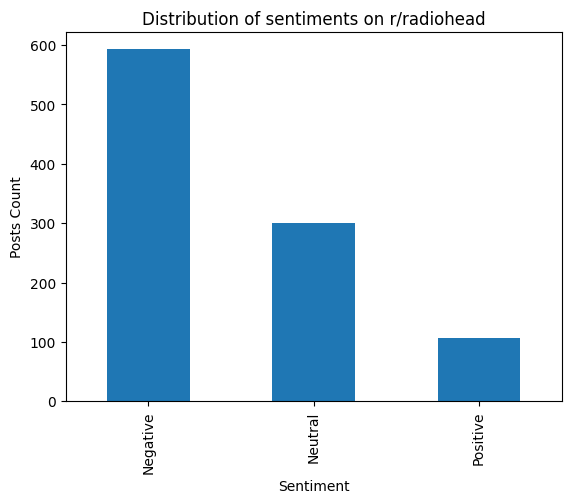

In [ ]:
sentiment_count = df.sentiment.value_counts()
sentiment_count.index = ["Negative", "Neutral", "Positive"]
sentiment_count.plot.bar(xlabel="Sentiment", ylabel="Posts Count", title="Distribution of sentiments on r/radiohead")

<Axes: title={'center': 'Posting frequency on r/Radiohead'}, xlabel='Date Created', ylabel='Posts Count'>

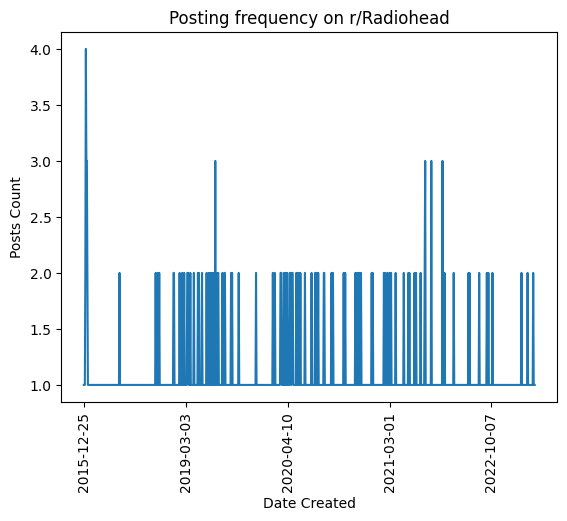

In [ ]:
created_count = df.created.value_counts().sort_index()
created_count.plot.line(xlabel="Date Created", ylabel="Posts Count", title="Posting frequency on r/Radiohead", rot=90)

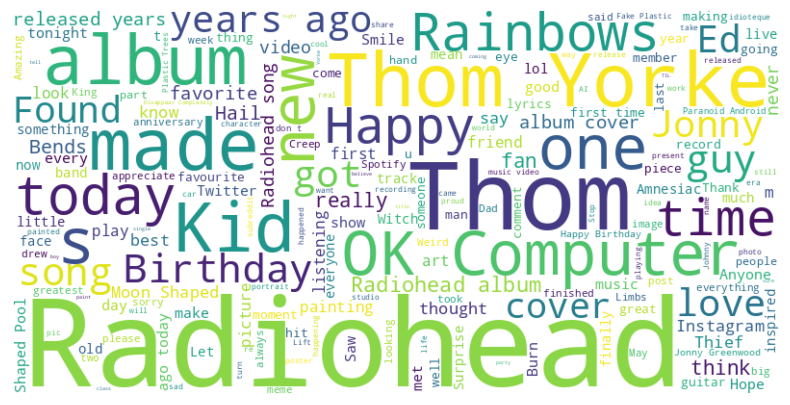

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

words = []

for title in df.title:
    words.extend(title.split())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
from datetime import datetime

subreddit = reddit.subreddit("mildlyinteresting")
submissions = []

for post in subreddit.top(time_filter='all', limit=1000):
#for post in subreddit.hot():
    submissions.append([
        post.title,
        post.num_comments,
        datetime.utcfromtimestamp(post.created_utc).strftime("%Y-%m-%d"),
        post.author,
        post.score,
        post.upvote_ratio,
        post.num_crossposts,
        analyze_emotion(post.title),
    ])

import nltk

analyzer = SentimentIntensityAnalyzer()

for post in submissions:
    score = analyzer.polarity_scores(clean_text(post[0]))
    post.append(score["compound"])

import pandas as pd

df = pd.DataFrame(
    submissions,
    columns=["title", "comments", "created", "author", "upvotes", "upvote_ratio", "crossposts", "emotion", "compound"],
)

df["sentiment"] = 0
df.loc[df["compound"] > 0.20, "sentiment"] = 1
df.loc[df["compound"] < -0.20, "sentiment"] = -1
df.loc[df["upvote_ratio"] > 0.90, "upvote_ratio"] = 1
df.loc[df["upvote_ratio"] <= 0.9, "upvote_ratio"] = -1

df.drop("compound", axis=1, inplace=True)
df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,title,comments,created,author,upvotes,upvote_ratio,crossposts,emotion,sentiment
0,Local Mexican restaurant used to be a Chinese ...,3150,2018-01-31,Bombaskos,245713,1.0,37,fear,0
1,Found the cliff this Clif bar came from.,2265,2018-03-10,AnGabhaDubh,183328,1.0,50,fear,0
2,I bought some suspiciously perfect bananas yes...,2553,2020-04-14,paigebennettblack,163740,1.0,39,trust,1
3,My hotel phone in Iceland has a special button...,1937,2021-06-27,KristjanHrannar,160992,1.0,6,positive,1
4,I have a hereditary gap in my eyebrow,2683,2019-07-12,None,160444,1.0,14,negative,0
...,...,...,...,...,...,...,...,...,...
991,The winter uniform for Norwegian train conduct...,1142,2023-03-28,Staehr,69008,1.0,11,fear,0
992,"Someone ""threw away"" helium balloons- they are...",1289,2017-05-31,baileasb,69009,-1.0,0,positive,1
993,This pencil sharpener does not remove the very...,1021,2021-03-12,reddit11898,68994,1.0,7,positive,0
994,My town has 100% electric school buses,2453,2019-04-09,7b21b9,68977,1.0,8,trust,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with the provided columns

# Features (X): Comments, Upvotes, Upvote Ratio
features = df[['comments', 'upvotes', 'sentiment','crossposts']]

# Target variable (y): Sentiment
target = df['upvote_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Sample Test Case
sample_test_case = pd.DataFrame([[1289, 69009, 1,0]])  # Adjust these values based on the sample test case
sample_prediction = knn_model.predict(sample_test_case)
print(f'Sample Test Case Prediction: {sample_prediction[0]}')

Accuracy: 0.805
Sample Test Case Prediction: -1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with the provided columns

# Features (X): Comments, Upvotes, Upvote Ratio
features = df[['comments', 'upvotes', 'upvote_ratio']]

# Target variable (y): Sentiment
target = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # You can adjust the kernel and other parameters as needed
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (SVM): {accuracy}')

# Sample Test Case
sample_test_case = pd.DataFrame([[50, 1000, 0.85]])  # Adjust these values based on the sample test case
sample_prediction = svm_model.predict(sample_test_case)
print(f'Sample Test Case Prediction (SVM): {sample_prediction[0]}')


Accuracy (SVM): 0.61
Sample Test Case Prediction (SVM): 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
